### New Analysis In-Progress

To try to find better results in regards to causes and effects, we are analyzing the past year before the war to try and determine whether we have considerate changes in the period of interest.

#### Imports and Variables

In [36]:
import pandas as pd
import dask.dataframe as dd 
import seaborn as sns

First, I'll just write a script to convert the dataset I've obtained into a new lighter version. This is just part of the data cleaning process.

In [8]:
MONTH_NAME = 'july'
YEAR = '21'
DATASET_ID = '1'
DATASET_NAME = MONTH_NAME+YEAR+'_'+DATASET_ID+'.csv'
df = dd.read_csv(DATASET_NAME)
df = df[['hash', 'block_number','block_timestamp','from_address','to_address','value']]
df

,hash,block_number,block_timestamp,from_address,to_address,value
npartitions=178,,,,,,
,object,int64,int64,object,object,object
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [ ]:
df.to_csv('./light-'+DATASET_NAME, single_file = True)

### Important accounts Analysis

In our previous work (OLIVEIRA, P. H. F.; REZENDE, D. M.; BERNARDINO, H. S.; VILLELA, S. M.; VIEIRA, A. B.; GONC ̧ ALVES, G. D. Análise do comportamento de contas no ethereum durante um evento de impacto na economia. In: SBC. Anais do V Workshop em Blockchain: Teoria, Tecnologias e Aplicações. [S.l.], 2022. p. 54–67.) we found some relevant accounts in the important period of the Russian invasion, with big degree variations. Can these accounts reveal something about that period?

First, let's check X2Y2: X2Y2 Token. The account with most significant change between February 10th and February 17th.

In [26]:
def get_degree_in_month(address, month):
    temp_df_0 = dd.read_csv('./light-'+month+'21_0.csv', dtype = {'value':'object'})
    temp_df_1 = dd.read_csv('./light-'+month+'21_1.csv', dtype = {'value':'object'})
    df = dd.concat([temp_df_0, temp_df_1])
    df = df.query('from_address == "'+address+'" or to_address == "'+address+'"')
    return len(df.compute())

In [30]:
X2Y2_ADDRESS = '0xfe44daeb65166846fccb3f4aa7186e36247b1c1e'

month_list = ['april', 'may', 'june', 'july', 'august', 'september', 'october', 'november']
X2Y2_dictionary = {'april': 3845, 'may': 3382, 'june' : 5138, 'july': 2645, 'august': 3726, 'september': 2981} 

for month in month_list:
    print('Reading '+month+'...')
    X2Y2_dictionary[month] = get_degree_in_month(X2Y2_ADDRESS, month)


print(X2Y2_dictionary)


Reading october...
Reading november...
{'april': 3845, 'may': 3382, 'june': 5138, 'july': 2645, 'august': 3726, 'september': 2981, 'october': 3670, 'november': 3236}


In [44]:
x2y2_df = pd.DataFrame.from_dict(X2Y2_dictionary, orient = 'index', columns =  ['Degree'])
x2y2_df = x2y2_df.reset_index(names = 'Month')
x2y2_df['Account'] = 'X2Y2 Token'
x2y2_df

,Month,Degree,Account
0,april,3845,X2Y2 Token
1,may,3382,X2Y2 Token
2,june,5138,X2Y2 Token
3,july,2645,X2Y2 Token
4,august,3726,X2Y2 Token
5,september,2981,X2Y2 Token
6,october,3670,X2Y2 Token
7,november,3236,X2Y2 Token


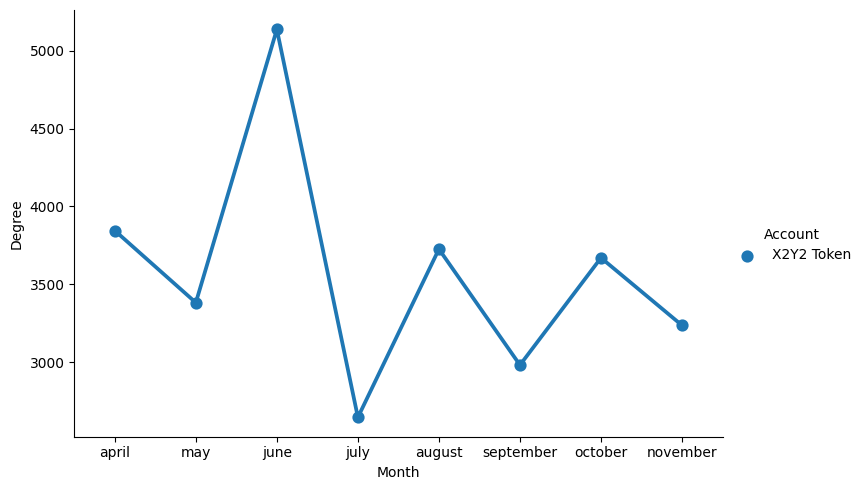

In [48]:
sns.catplot(data = x2y2_df, x = 'Month', y = 'Degree', hue = 'Account', kind = 'point', height=5, aspect=1.5)
